In [ ]:
# This program simulates bacterial chemotaxis in a constant concentration of attractants c_0.
# The output of this program is a plot of the distribution of tumble propensities for white and correlated noise,
# given varying values of counting noise amplitude. In addition correlated noise is mapped to white noise,
# shown in the similar distribution of running times.
# The response function is taken to be a DELTA KERNEL.
# Counting noise is implemented by adding an effective white noise or correlated to the concentration.
# All bacteria start at position = 0 and time = 0, which is the time of last tumbling.
# We record the time duration of one run for all bacteria to determine
# the average running time given a concentration and save tumble propensities at every time step.
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [ ]:
tau = 1                     # average running time if c = 0 in seconds
dt = 0.01                   # time step of simulations in seconds
c_0 = 0.5                   # average concentration (unitless)
N_s = 10000                 # number of trajectories simulated
binwidth = 1                # binwidth of histograms
P_tumble_0 = (1-c_0)/tau    # the tumble propensity for a constant concentration c_0
gamma = 10                  # rate with which the noise returns to the mean in 1/s

In [ ]:
# Define Gaussian noise with the noise amplitude as input
def noise(sigma):
   gaussian_n = np.random.normal(0, sigma)
   return gaussian_n

In [ ]:
# Calculating the average running time for white noise, using the Walking algorithm
def t_run_average(sigma, c_0):
    t_end = []      # list or running times
    list_p = []     # list of tumble propensities

    # for N_s bacteria one run is simulated
    for s in range(0, N_s):
        x = 0       # the amount of times the bacteria has tumbled since t = 0
        t = 0

        # While the bacteria is running
        while x<1:
            # Pick a random number uniformly distributed between 0 and 1.
            i = random.uniform(0,1)
            # Calculate the tumble probability
            P_tumble = 1/tau *((1- c_0 )*dt - noise(sigma)* (dt)**(0.5))
            list_p.append(P_tumble/dt)

            # If the random number is smaller than the tumble probability, the bacteria tumbles.
            # Save the running time and update x.
            if i<P_tumble:
                t_end.append(t)
                x = 1

            # Update the time
            t = t+dt
    return t_end, list_p

In [ ]:
# Calculating the average running time for white noise, using the Gillespie algorithm
def t_run_average_2(sigma, c_0):
    t_end = []
    list_p = []

    # for N_s bacteria one run is simulated
    for s in range(0, N_s):
        x = 0
        t=0
        i = random.uniform(0,1)
        # Obtain a random number distributed by a logarithm. This will be compared to the integral of tumble probabilities.
        integral_random = np.log(1/i)
        integral_P_tumble = 0         # the integral of all past tumble probabilities.

        # While the bacteria is running
        while x<1:
            # Calculate the tumble probability and the integrall of all tumble probabilities till now.
            P_tumble = 1/tau *((1- c_0 )*dt + noise(sigma)* (dt)**(0.5))
            list_p.append(P_tumble/dt)
            integral_P_tumble = integral_P_tumble + P_tumble

            # If the random number is smaller than the integral of tumble probabilities, the bacteria tumbles.
            # Save the running time and update x.
            if integral_random < integral_P_tumble:
                t_end.append(t)
                x = 1
            t= t+dt
    return t_end, list_p

In [ ]:
# Calculating the average running time for correlated noise, using the Walking algorithm as done above.
def t_run_average_c(sigma, c_0):
    t_end = []
    list_p = []
    for s in range(0, N_s):
        x = 0
        t = 0
        # Initialise the noise with steady state correlated noise
        n_old = 1/np.sqrt(2*gamma) *sigma *noise(1)
        while x<1:
            i = random.uniform(0,1)
            # Calculate the noise as described by the Ornstein Uhlenbeck process
            n_new = n_old - gamma *(n_old)*dt + sigma *noise(1)*(dt)**(0.5)
            c_t = c_0 + n_new
            P_tumble = 1/tau *(1- c_t)*dt
            list_p.append(P_tumble/dt)
            if i<P_tumble:
                t_end.append(t)
                x = 1
            t = t+dt
            # Update the noise
            n_old = n_new
            if t>20:
              break
    return t_end, list_p

In [ ]:
# Calculating the average running time for correlated noise, using the Gillespie algorithm as done above.
def t_run_average_c2(sigma, c_0):
    t_end = []
    list_p = []
    for s in range(0, N_s):
        x = 0
        t=0
        i = random.uniform(0,1)
        integral_random = np.log(1/i)
        integral_P_tumble = 0
        # Initialise the noise with steady state correlated noise
        n_old = 1/np.sqrt(2*gamma)* sigma *noise(1)
        while x<1:
            # Calculate the noise as described by the Ornstein Uhlenbeck process
            n_new = n_old - gamma *(n_old)*dt + sigma *noise(1)* (dt)**(0.5)
            c_t = c_0 + n_new
            P_tumble = 1/tau *(1- c_t )*dt
            list_p.append(P_tumble/dt)
            integral_P_tumble = integral_P_tumble + P_tumble
            if integral_random < integral_P_tumble:
                t_end.append(t)
                x = 1
            t= t+dt
            # Update the noise
            n_old = n_new
            if t>20:
              break
    return t_end, list_p

In [ ]:
# Calculate the running times and tumble propensities for different counting noise using white noise.
dt = 0.1
sigma = 0
t_end_1, list_p = t_run_average(sigma, c_0)
t_end_2, list_p =  t_run_average_2(sigma, c_0)

sigma = 0.01
t_end_w1, list_p_w1 = t_run_average(sigma, c_0)
t_end_w2, list_p_w2 =  t_run_average_2(sigma, c_0)

sigma = 0.05
t_end_w3, list_p_w3 = t_run_average(sigma, c_0)
t_end_w4, list_p_w4 =  t_run_average_2(sigma, c_0)

sigma = 0.1
t_end_w5, list_p_w5 = t_run_average(sigma, c_0)
t_end_w6, list_p_w6 =  t_run_average_2(sigma, c_0)

sigma = 0.2
t_end_N1, list_p = t_run_average(sigma, c_0)
t_end_N2, list_p =  t_run_average_2(sigma, c_0)

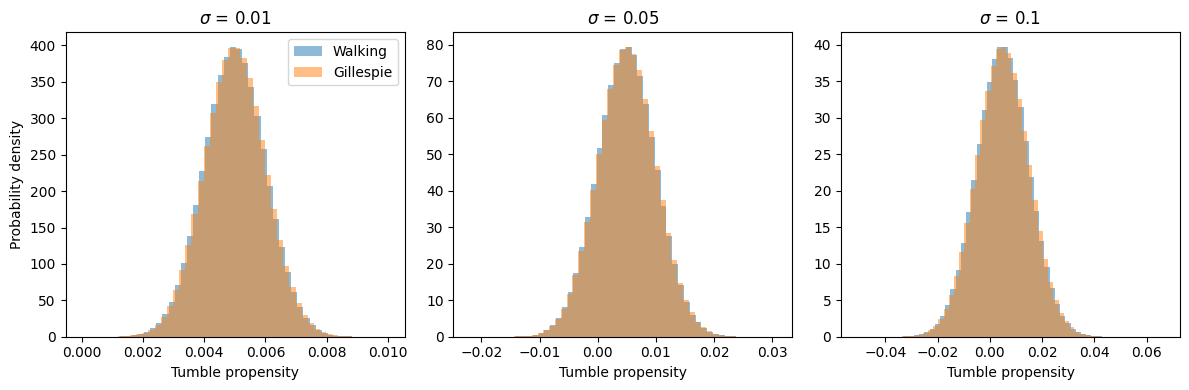

In [ ]:
# Plot the distribution of tumble propensities for different counting noise using white noise
figure, axis = plt.subplots(1, 3, figsize=(12, 4))
binwidth = 0.0002
axis[0].hist(list_p_w1, bins =np.arange(np.min(list_p_w1), np.max(list_p_w1) + binwidth, binwidth), density = True, alpha=0.5, label = 'Walking')
axis[0].hist(list_p_w2, bins =np.arange(np.min(list_p_w2), np.max(list_p_w2) + binwidth, binwidth), density = True, alpha=0.5, label = 'Gillespie')
axis[0].set_title('$\sigma$ = 0.01')
axis[0].set(xlabel ='Tumble propensity', ylabel = 'Probability density' )
axis[0].legend()

binwidth = 0.001
axis[1].hist(list_p_w3, bins =np.arange(np.min(list_p_w3), np.max(list_p_w3) + binwidth, binwidth), density = True, alpha=0.5, label = 'Walking')
axis[1].hist(list_p_w4, bins =np.arange(np.min(list_p_w4), np.max(list_p_w4) + binwidth, binwidth), density = True, alpha=0.5, label = 'Gillespie')
axis[1].set_title('$\sigma$ = 0.05')
axis[1].set(xlabel ='Tumble propensity')

binwidth = 0.002
axis[2].hist(list_p_w5, bins =np.arange(np.min(list_p_w5), np.max(list_p_w5) + binwidth, binwidth), density = True, alpha=0.5, label = 'Walking')
axis[2].hist(list_p_w6, bins =np.arange(np.min(list_p_w6), np.max(list_p_w6) + binwidth, binwidth), density = True, alpha=0.5, label = 'Gillespie')
axis[2].set_title('$\sigma$ = 0.1')
axis[2].set(xlabel ='Tumble propensity')


plt.tight_layout()
plt.show()


In [ ]:
# Calculate the running times and tumble propensities for different counting noise using correlated noise.
# Here sigma reflects the counting noise amplitude,
# more precisely, sigma is the noise amplitude of the Gaussian term in the correlated noise.
dt =0.01

sigma = 0.01
t_end, list_p_c1 = t_run_average_c(sigma, c_0)
t_end, list_p_c2 =  t_run_average_c2(sigma, c_0)

sigma = 0.05
t_end, list_p_c3 = t_run_average_c(sigma, c_0)
t_end, list_p_c4 =  t_run_average_c2(sigma, c_0)

sigma = 0.1
t_end, list_p_c5 = t_run_average_c(sigma, c_0)
t_end, list_p_c6 =  t_run_average_c2(sigma, c_0)

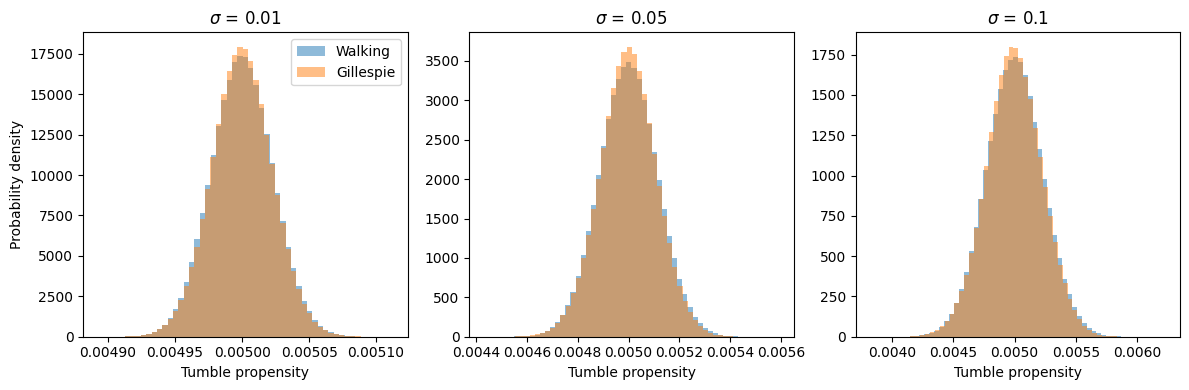

In [ ]:
# Plot the distribution of tumble propensities for different counting noise using correlated noise.
figure, axis = plt.subplots(1, 3, figsize=(12, 4))
binwidth = 0.000004
axis[0].hist(list_p_c1, bins =np.arange(np.min(list_p_c1), np.max(list_p_c1) + binwidth, binwidth), density = True, alpha=0.5, label = 'Walking')
axis[0].hist(list_p_c2, bins =np.arange(np.min(list_p_c2), np.max(list_p_c2) + binwidth, binwidth), density = True, alpha=0.5, label = 'Gillespie')
axis[0].set_title('$\sigma$ = 0.01')
axis[0].set(xlabel ='Tumble propensity', ylabel = 'Probability density' )
axis[0].legend()

binwidth = 0.00002
axis[1].hist(list_p_c3, bins =np.arange(np.min(list_p_c3), np.max(list_p_c3) + binwidth, binwidth), density = True, alpha=0.5, label = 'Walking')
axis[1].hist(list_p_c4, bins =np.arange(np.min(list_p_c4), np.max(list_p_c4) + binwidth, binwidth), density = True, alpha=0.5, label = 'Gillespie')
axis[1].set_title('$\sigma$ = 0.05')
axis[1].set(xlabel ='Tumble propensity')

binwidth = 0.00004
axis[2].hist(list_p_c5, bins =np.arange(np.min(list_p_c5), np.max(list_p_c5) + binwidth, binwidth), density = True, alpha=0.5, label = 'Walking')
axis[2].hist(list_p_c6, bins =np.arange(np.min(list_p_c6), np.max(list_p_c6) + binwidth, binwidth), density = True, alpha=0.5, label = 'Gillespie')
axis[2].set_title('$\sigma$ = 0.1')
axis[2].set(xlabel ='Tumble propensity')


plt.tight_layout()
plt.show()


In [ ]:
# Map correlated noise to white noise using sigma_w = 0.01.
# Calculate the running times and tumble propensity for the corresponding counting noise amplitude.
gamma = 20
sigma_c = 0.01* gamma*np.sqrt(2)
t_end_m1, list_p_m1 = t_run_average_c(sigma_c, c_0)
t_end_m2, list_p_m2 =  t_run_average_c2(sigma_c, c_0)

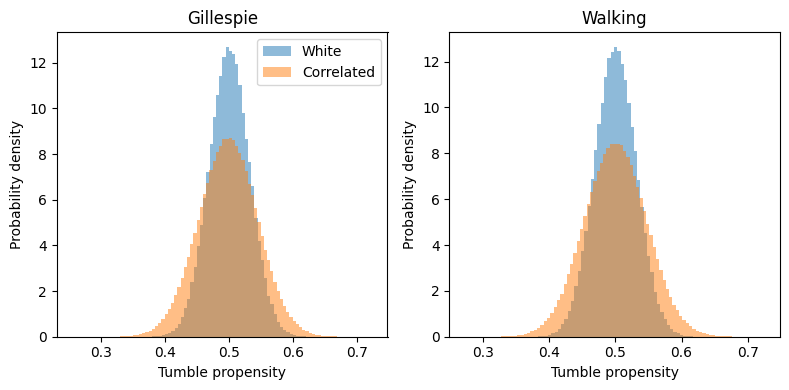

In [ ]:
# Plot the distribution of propensities for white noise and correlated noise using the Gillespie algorithm with sigma_w = 0.01.
'''
figure, axis = plt.subplots(1, 2, figsize=(8, 4))

binwidth = 0.005
axis[0].hist(list_p_w2, bins =np.arange(np.min(list_p_w2), np.max(list_p_w2) + binwidth, binwidth), density = True, alpha=0.5, label = 'White')
axis[0].hist(list_p_m2, bins =np.arange(np.min(list_p_m2), np.max(list_p_m2) + binwidth, binwidth), density = True, alpha=0.5, label = 'Correlated')
axis[0].set_title('Gillespie')
axis[0].set(xlabel ='Tumble propensity', ylabel = 'Probability density' )
axis[0].legend()

axis[1].hist(list_p_w1, bins =np.arange(np.min(list_p_w1), np.max(list_p_w1) + binwidth, binwidth), density = True, alpha=0.5, label = 'White')
axis[1].hist(list_p_m1, bins =np.arange(np.min(list_p_m1), np.max(list_p_m1) + binwidth, binwidth), density = True, alpha=0.5, label = 'Correlated')
axis[1].set_title('Walking')
axis[1].set(xlabel ='Tumble propensity', ylabel = 'Probability density' )


plt.tight_layout()
plt.show()
'''


In [ ]:
# Calculate the distribution of running times for zero noise.
theory = []
time = []
for t in np.arange(0, 20, 0.1):
  time.append(t)
  theo = P_tumble_0 * np.exp(-P_tumble_0 * t)
  theory.append(theo)

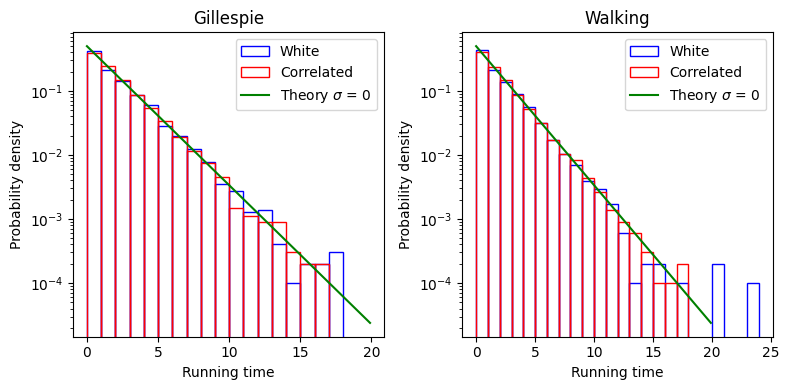

In [ ]:
# Plot the distribution of running times for correlated and white noise using both the Walking and Gillespie algorithm,
# and plotting the theory for zero noise.
figure, axis = plt.subplots(1, 2, figsize=(8, 4))
binwidth = 1
axis[0].hist(t_end_w2, bins =np.arange(np.min(t_end_w2), np.max(t_end_w2) + binwidth, binwidth), fill=False, edgecolor= "blue", density= True, label = 'White')
axis[0].hist(t_end_m2, bins =np.arange(np.min(t_end_m2), np.max(t_end_m2) + binwidth, binwidth), fill=False, edgecolor= 'red', density= True, label = 'Correlated')
axis[0].plot(time, theory, color = 'green', label = 'Theory $\sigma$ = 0')
axis[0].set(xlabel = 'Running time', ylabel = 'Probability density')
axis[0].set_title('Gillespie')
axis[0].set_yscale('log')
axis[0].legend()

axis[1].hist(t_end_w1, bins =np.arange(np.min(t_end_w1), np.max(t_end_w1) + binwidth, binwidth), fill=False, edgecolor= "blue", density= True, label = 'White')
axis[1].hist(t_end_m1, bins =np.arange(np.min(t_end_m1), np.max(t_end_m1) + binwidth, binwidth), fill=False, edgecolor= 'red', density= True, label = 'Correlated')
axis[1].plot(time, theory, color = 'green', label = 'Theory $\sigma$ = 0')
axis[1].set(xlabel = 'Running time', ylabel = 'Probability density')
axis[1].set_title('Walking')
axis[1].set_yscale('log')
axis[1].legend()


plt.tight_layout()
plt.show()